In [49]:
# [Muhammad, Haisam]
# [20195819]
# [MMA]
# [Winter]
# [869]
# [12-08-2020]

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
import scipy
import cufflinks as cf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline

In [50]:
# Answer to Question [7], Part [2]

## Loading the Data

In [51]:
#loading the data
dataset = pd.read_csv('OJ.csv',index_col=None)

In [52]:
dataset.rename(columns={'Unnamed: 0':'Id'}, inplace=True )

In [53]:
#check the shape of data
dataset.shape

(1070, 19)

## Data Split

Seen data will be the one on which the model will be created and will be split into test and train, K fold stratified cross validation will be performed

In order to demonstrate the predict_model() function on unseen data, a sample of records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these records are not available at the time when the machine learning experiment was performed.

In [54]:
data = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1016, 19)
Unseen Data For Predictions: (54, 19)


In [55]:
list(data)
data.shape
data.info()
data.describe().transpose()
data.head(n=20)
data.tail()

['Id',
 'Purchase',
 'WeekofPurchase',
 'StoreID',
 'PriceCH',
 'PriceMM',
 'DiscCH',
 'DiscMM',
 'SpecialCH',
 'SpecialMM',
 'LoyalCH',
 'SalePriceMM',
 'SalePriceCH',
 'PriceDiff',
 'Store7',
 'PctDiscMM',
 'PctDiscCH',
 'ListPriceDiff',
 'STORE']

(1016, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1016 non-null   int64  
 1   Purchase        1016 non-null   object 
 2   WeekofPurchase  1016 non-null   int64  
 3   StoreID         1016 non-null   int64  
 4   PriceCH         1016 non-null   float64
 5   PriceMM         1016 non-null   float64
 6   DiscCH          1016 non-null   float64
 7   DiscMM          1016 non-null   float64
 8   SpecialCH       1016 non-null   int64  
 9   SpecialMM       1016 non-null   int64  
 10  LoyalCH         1016 non-null   float64
 11  SalePriceMM     1016 non-null   float64
 12  SalePriceCH     1016 non-null   float64
 13  PriceDiff       1016 non-null   float64
 14  Store7          1016 non-null   object 
 15  PctDiscMM       1016 non-null   float64
 16  PctDiscCH       1016 non-null   float64
 17  ListPriceDiff   1016 non-null   f

,count,mean,std,min,25%,50%,75%,max
Id,1016.0,536.625984,309.944762,1.000000,266.750000,536.00,806.250000,1070.000000
WeekofPurchase,1016.0,254.615157,15.489915,227.000000,240.000000,257.00,268.000000,278.000000
StoreID,1016.0,3.975394,2.312609,1.000000,2.000000,3.00,7.000000,7.000000
PriceCH,1016.0,1.868583,0.101429,1.690000,1.790000,1.86,1.990000,2.090000
PriceMM,1016.0,2.085738,0.132824,1.690000,1.990000,2.09,2.180000,2.290000
DiscCH,1016.0,0.052579,0.118225,0.000000,0.000000,0.00,0.000000,0.500000
DiscMM,1016.0,0.123110,0.213860,0.000000,0.000000,0.00,0.240000,0.800000
SpecialCH,1016.0,0.150591,0.357825,0.000000,0.000000,0.00,0.000000,1.000000
SpecialMM,1016.0,0.163386,0.369899,0.000000,0.000000,0.00,0.000000,1.000000
LoyalCH,1016.0,0.569037,0.307609,0.000011,0.336363,0.60,0.853465,0.999947


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,311,CH,272,2,1.86,2.18,0.00,0.06,0,0,0.471378,2.12,1.86,0.26,No,0.027523,0.000000,0.32,2
1,846,MM,274,2,1.96,2.18,0.00,0.80,0,1,0.263607,1.38,1.96,-0.58,No,0.366972,0.000000,0.22,2
2,488,CH,238,2,1.75,1.99,0.00,0.00,0,0,0.744000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,2
3,55,CH,256,4,1.99,2.29,0.00,0.00,0,0,0.667976,2.29,1.99,0.30,No,0.000000,0.000000,0.30,4
4,293,MM,270,2,1.86,2.18,0.00,0.00,0,0,0.000396,2.18,1.86,0.32,No,0.000000,0.000000,0.32,2
5,686,MM,259,7,1.86,2.18,0.00,0.00,0,0,0.104858,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
6,866,CH,233,7,1.75,1.99,0.00,0.40,1,0,0.384874,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
7,250,CH,268,7,1.86,2.13,0.00,0.00,0,0,0.984589,2.13,1.86,0.27,Yes,0.000000,0.000000,0.27,0
8,752,CH,232,4,1.79,2.09,0.00,0.00,0,0,0.400000,2.09,1.79,0.30,No,0.000000,0.000000,0.30,4
9,466,CH,267,7,1.86,2.13,0.00,0.00,1,0,0.787008,2.13,1.86,0.27,Yes,0.000000,0.000000,0.27,0


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1011,924,MM,275,7,1.99,2.13,0.0,0.54,1,0,0.554240,1.59,1.99,-0.40,Yes,0.253521,0.000000,0.14,0
1012,1038,MM,233,1,1.69,1.99,0.0,0.00,0,0,0.500000,1.99,1.69,0.30,No,0.000000,0.000000,0.30,1
1013,291,MM,266,3,1.99,2.09,0.1,0.00,0,0,0.000619,2.09,1.89,0.20,No,0.000000,0.050251,0.10,3
1014,685,MM,256,7,1.86,2.18,0.0,0.00,0,0,0.131072,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1015,18,MM,268,2,1.86,2.18,0.0,0.00,0,1,0.400000,2.18,1.86,0.32,No,0.000000,0.000000,0.32,2


## Preprocessing the data

In [56]:
#changing Puchase to binary, CH to 1 and MM to 0

CH = 'CH'
MM = 'MM'

data['Purchase'] = data['Purchase'].apply(lambda x: 1 if x in CH else 0)

In [57]:
#changing Puchase to binary, CH to 1 and MM to 0

Yes = 'Yes'

data['Store7'] = data['Store7'].apply(lambda x: 1 if x in Yes else 0)

In [58]:
#Creating dummies for stores and dropping STORE and StoreID as they are not required after dummy variables
store_dummies = pd.get_dummies(data['STORE'])
store_dummies.rename(columns ={0:'Store0', 1:'Store1',2:'Store2',3:'Store3',4:'Store4'}, inplace = True)
data = data.join(store_dummies)
data.drop(['STORE'],axis =1, inplace = True)
data.drop(['StoreID'],axis =1, inplace = True)

In [59]:
data.head(5)

,Id,Purchase,WeekofPurchase,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,...,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,Store0,Store1,Store2,Store3,Store4
0,311,1,272,1.86,2.18,0.0,0.06,0,0,0.471378,...,0.26,0,0.027523,0.0,0.32,0,0,1,0,0
1,846,0,274,1.96,2.18,0.0,0.80,0,1,0.263607,...,-0.58,0,0.366972,0.0,0.22,0,0,1,0,0
2,488,1,238,1.75,1.99,0.0,0.00,0,0,0.744000,...,0.24,0,0.000000,0.0,0.24,0,0,1,0,0
3,55,1,256,1.99,2.29,0.0,0.00,0,0,0.667976,...,0.30,0,0.000000,0.0,0.30,0,0,0,0,1
4,293,0,270,1.86,2.18,0.0,0.00,0,0,0.000396,...,0.32,0,0.000000,0.0,0.32,0,0,1,0,0


In [60]:
#Using pycaret for further pre-processing for model generation

In [61]:
from pycaret.classification import *

In [62]:
exp_clf101 = setup(data = data, target = 'Purchase', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  group_features=['PriceMM','PriceCH'],
                  pca=True, pca_method='linear', pca_components=0.95,
                  log_experiment=True, log_plots = True)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1016, 22)"
4,Missing Values,False
5,Numeric Features,18
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [63]:
#Comparing the different models available and their relative performance metrics

In [64]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ridge Classifier,0.8369,0.0000,0.8636,0.8734,0.8677,0.6546,0.6566,0.0039
1,Linear Discriminant Analysis,0.8355,0.9009,0.8614,0.8732,0.8664,0.6519,0.6541,0.0057
2,Logistic Regression,0.8341,0.9017,0.8727,0.8636,0.8672,0.6457,0.6482,0.0094
3,Naive Bayes,0.8157,0.8893,0.8568,0.8494,0.8525,0.6068,0.6083,0.0032
4,Extreme Gradient Boosting,0.8115,0.8707,0.8568,0.8451,0.8492,0.5969,0.6011,0.0516
5,CatBoost Classifier,0.8073,0.8866,0.8591,0.8374,0.8464,0.5870,0.5918,2.1861
6,Quadratic Discriminant Analysis,0.8031,0.8840,0.8136,0.8639,0.8363,0.5891,0.5941,0.0033
7,Ada Boost Classifier,0.8003,0.8690,0.8591,0.8286,0.8416,0.5701,0.5758,0.0904
8,Light Gradient Boosting Machine,0.8003,0.8717,0.8523,0.8366,0.8418,0.5696,0.5762,0.0655
9,Gradient Boosting Classifier,0.7961,0.8703,0.8500,0.8280,0.8376,0.5628,0.5666,0.1591


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

## Building the 3 models

### Model 1 - Decision Trees

In [65]:
#Decision Trees using 5 fold stratified cross validation
dt = create_model('dt', fold = 5)
print(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7133,0.6852,0.8068,0.7474,0.7760,0.3795,0.3817
1,0.7465,0.7168,0.8409,0.7708,0.8043,0.4463,0.4497
2,0.7606,0.7603,0.7614,0.8375,0.7976,0.5061,0.5096
3,0.7465,0.7418,0.7614,0.8171,0.7882,0.4734,0.4753
4,0.7394,0.7182,0.8068,0.7802,0.7933,0.4412,0.4416
Mean,0.7412,0.7245,0.7955,0.7906,0.7919,0.4493,0.4516
SD,0.0156,0.0254,0.0305,0.0325,0.0096,0.0419,0.0422


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


<Figure size 432x288 with 0 Axes>

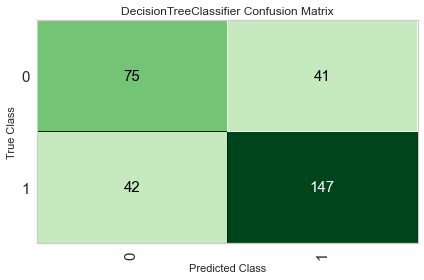

In [66]:
plot_model(dt, plot='confusion_matrix')

### Model Tuned to optimize AUC

In [67]:
tuned_dt = tune_model(dt, fold =15, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6875,0.7306,0.6333,0.8261,0.7170,0.3814,0.3984
1,0.7500,0.7741,0.8667,0.7647,0.8125,0.4419,0.4497
2,0.7292,0.7963,0.8667,0.7429,0.8000,0.3882,0.3995
3,0.8125,0.8019,0.8333,0.8621,0.8475,0.6044,0.6050
4,0.7500,0.8676,0.7667,0.8214,0.7931,0.4783,0.4801
5,0.7500,0.7604,0.8966,0.7429,0.8125,0.4472,0.4653
6,0.8085,0.8697,0.7586,0.9167,0.8302,0.6151,0.6297
7,0.7234,0.7663,0.7586,0.7857,0.7719,0.4209,0.4213
8,0.6383,0.7854,0.9310,0.6429,0.7606,0.1132,0.1540
9,0.8511,0.8573,0.8621,0.8929,0.8772,0.6882,0.6888


<Figure size 432x288 with 0 Axes>

In [68]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


### Printing the best hyper parameter for Model 1 - Decision Tree

In [69]:
plot_model(tuned_dt, plot = 'parameter')

,Parameters
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,3
max_features,8
max_leaf_nodes,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,6
min_samples_split,2


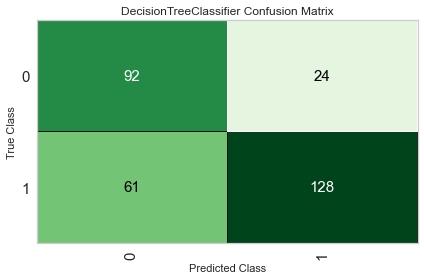

In [70]:
plot_model(tuned_dt, plot='confusion_matrix')

In [71]:
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7213,0.7766,0.6772,0.8421,0.7507,0.4431,0.4567


### Model 2 - Logistic Regression

In [72]:
#Logistic Regression

lr = create_model('lr', fold = 5)
print(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8252,0.8934,0.8977,0.8316,0.8634,0.6217,0.6252
1,0.8239,0.8923,0.8636,0.8539,0.8588,0.6251,0.6252
2,0.9014,0.9632,0.8977,0.9405,0.9186,0.7938,0.7952
3,0.7958,0.8670,0.8182,0.8471,0.8324,0.5713,0.5719
4,0.8028,0.8638,0.8523,0.8333,0.8427,0.5786,0.5789
Mean,0.8298,0.8959,0.8659,0.8613,0.8632,0.6381,0.6393
SD,0.0376,0.0358,0.0300,0.0405,0.0299,0.0808,0.0811


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


<Figure size 432x288 with 0 Axes>

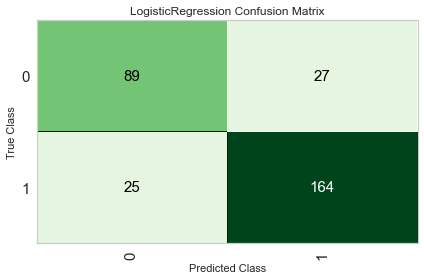

In [73]:
plot_model(lr, plot='confusion_matrix')

### Model Tuned on to optimize AUC

In [74]:
tuned_lr = tune_model(lr, fold =15, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7917,0.9019,0.8333,0.8333,0.8333,0.5556,0.5556
1,0.8333,0.8889,0.8000,0.9231,0.8571,0.6596,0.6693
2,0.8333,0.8926,0.8333,0.8929,0.8621,0.6522,0.6547
3,0.8542,0.9278,0.8667,0.8966,0.8814,0.6923,0.6930
4,0.7708,0.8833,0.7667,0.8519,0.8070,0.5269,0.5313
5,0.8125,0.8711,0.8621,0.8333,0.8475,0.6044,0.6050
6,0.8723,0.9789,0.8276,0.9600,0.8889,0.7408,0.7521
7,0.8511,0.9464,0.7586,1.0000,0.8627,0.7065,0.7391
8,0.9574,0.9962,0.9310,1.0000,0.9643,0.9118,0.9154
9,0.7872,0.8621,0.7241,0.9130,0.8077,0.5766,0.5961


<Figure size 432x288 with 0 Axes>

In [75]:
print(tuned_lr)

LogisticRegression(C=3.931, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Printing the best hyper parameter for Model 2 - Logistic Regression

In [76]:
plot_model(tuned_lr, plot = 'parameter')

,Parameters
C,3.931
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,-1
penalty,l2


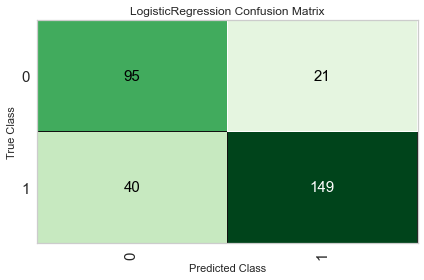

In [77]:
plot_model(tuned_lr, plot='confusion_matrix')

In [78]:
predict_model(tuned_lr);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8,0.8864,0.7884,0.8765,0.8301,0.5887,0.5936


### Model 3 - Random Forrest

In [79]:
#Random Forest Classifier

rf = create_model('rf', fold = 5)
print(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7902,0.8185,0.8750,0.8021,0.8370,0.5444,0.5485
1,0.7958,0.8427,0.8750,0.8105,0.8415,0.5556,0.5588
2,0.8803,0.9359,0.8864,0.9176,0.9017,0.7487,0.7494
3,0.7746,0.8249,0.7614,0.8590,0.8072,0.5384,0.5441
4,0.7606,0.8080,0.8295,0.7935,0.8111,0.4846,0.4855
Mean,0.8003,0.8460,0.8455,0.8365,0.8397,0.5743,0.5773
SD,0.0418,0.0464,0.0464,0.0465,0.0339,0.0905,0.0898


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


<Figure size 432x288 with 0 Axes>

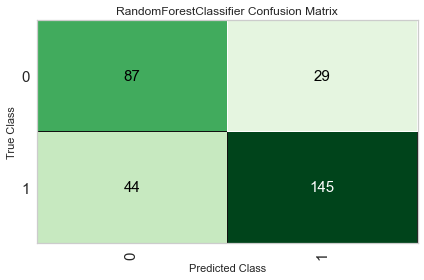

In [80]:
plot_model(rf, plot='confusion_matrix')

### Model Tuned on to optimize AUC

In [81]:
tuned_rf = tune_model(rf, fold =15, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8750,0.9204,0.8667,0.9286,0.8966,0.7391,0.7419
1,0.7500,0.8593,0.8333,0.7812,0.8065,0.4545,0.4564
2,0.8125,0.8778,0.9000,0.8182,0.8571,0.5862,0.5919
3,0.8333,0.9111,0.9000,0.8438,0.8710,0.6364,0.6390
4,0.8125,0.8815,0.9000,0.8182,0.8571,0.5862,0.5919
5,0.8125,0.8766,0.8966,0.8125,0.8525,0.5970,0.6025
6,0.8936,0.9789,0.9310,0.9000,0.9153,0.7725,0.7733
7,0.8511,0.9195,0.8276,0.9231,0.8727,0.6945,0.7006
8,0.8511,0.9655,1.0000,0.8056,0.8923,0.6598,0.7016
9,0.7872,0.8889,0.7931,0.8519,0.8214,0.5591,0.5613


<Figure size 432x288 with 0 Axes>

In [82]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


### Printing the best hyper parameter for Model 3 - Random Forrest

In [83]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,20
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


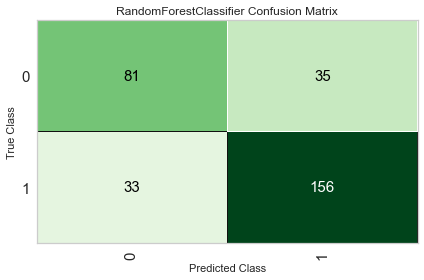

In [84]:
plot_model(tuned_rf, plot='confusion_matrix')

In [85]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.777,0.8583,0.8254,0.8168,0.8211,0.5254,0.5255
